In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
np.random.seed(1)

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

import utils

In [6]:
dataset_folder = 'Datasets/'
dataset = utils.load_dataset('mortality', discretize=False, balance=True, dataset_folder=dataset_folder)

In [29]:
dataset_folder = 'Datasets/'
dataset = utils.load_dataset('mortality', discretize=False, balance=True, dataset_folder=dataset_folder)
a = np.unique(dataset.train[:,12])
# dataset.train[:,12] = a[1]
# dataset.ori_train[:,12] = 'Yes'
msk = np.where(dataset.labels_train == 1)[0]
msk = np.random.choice(msk,int(msk.shape[0]*0.85), replace = False)
dataset.train[msk,12] = a[0]
dataset.ori_train[msk,12] = 'No'
msk = np.where(dataset.labels_train == 0)[0]
msk = np.random.choice(msk,int(msk.shape[0]*0.80), replace = False)
dataset.train[msk,12] = a[1]
dataset.ori_train[msk,12] = 'Yes'


In [7]:
a_dict = {'ano' : range(14),
'alime' : [0,3,5,2,12,1,4,6,7,8,9,10,11,13],
'aanchor' : [3,0,12,6,5,4,2,8,11,9,10,1,13,7],
'ashap' : [0,3,12,5,6,4,2,10,11,8,1,9,7,13]}
b_dict = {'bno' : range(14),
'blime' : [12,0,3,5,2,4,11,6,9,13,10,7,1,8],
'banchor' : [12,0,1,2,3,4,5,6,7,8,9,10,11,13],
'bshap' : [12,0,1,2,3,4,5,6,7,8,9,10,11,13]}

In [8]:
dead_idx = np.where(dataset.labels_train==1)[0]
not_idx = np.where(dataset.labels_train==0)[0]

In [9]:
def strinitials(x):
    s=[];
    for i in range(len(x)):
        s.append(''.join([s[:1]+' ' for s in x[i].split(' ')]))
    return s

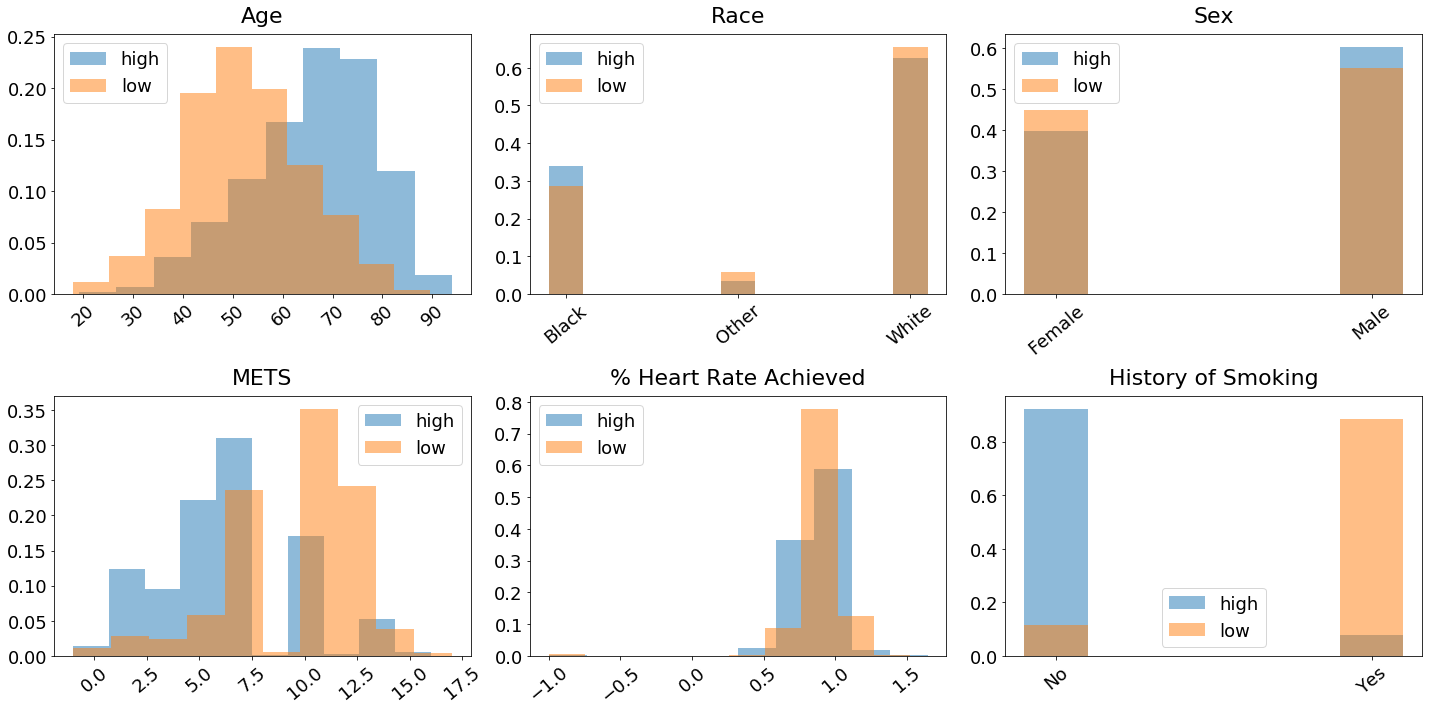

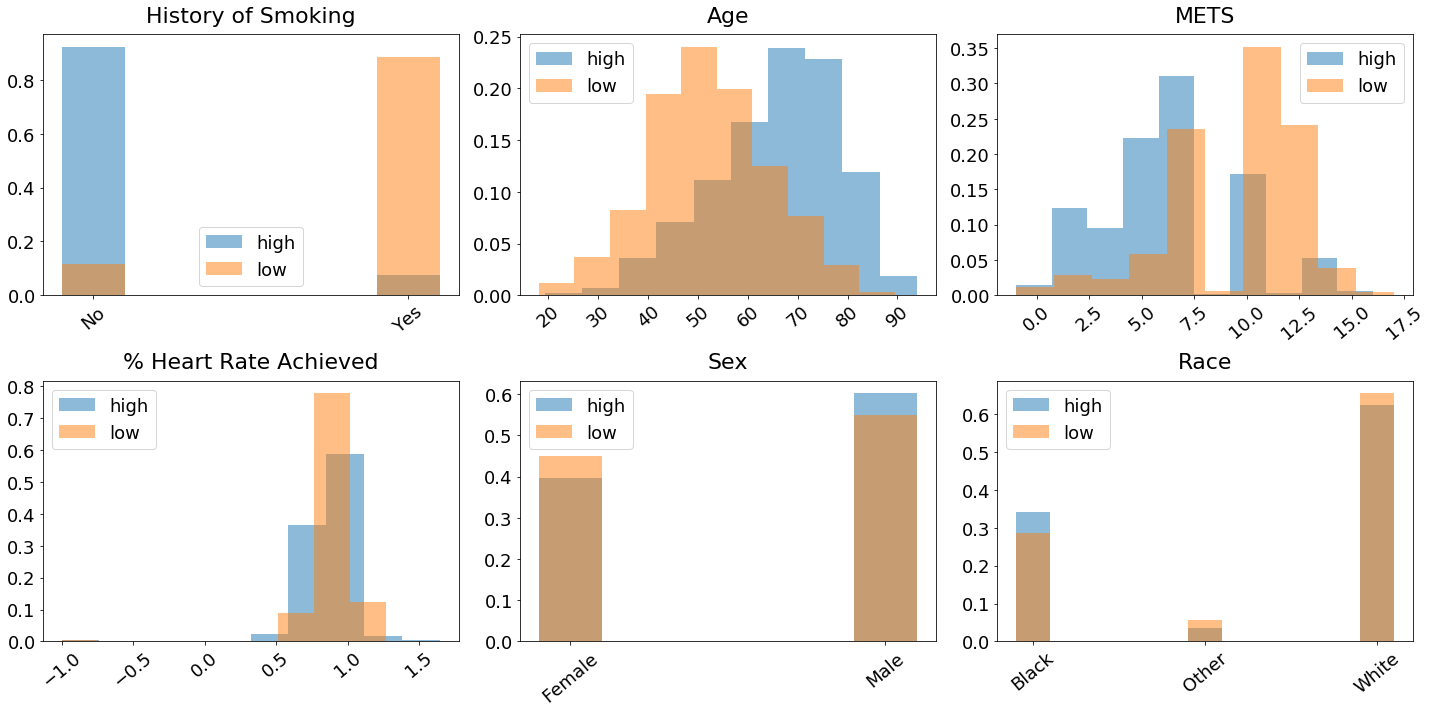

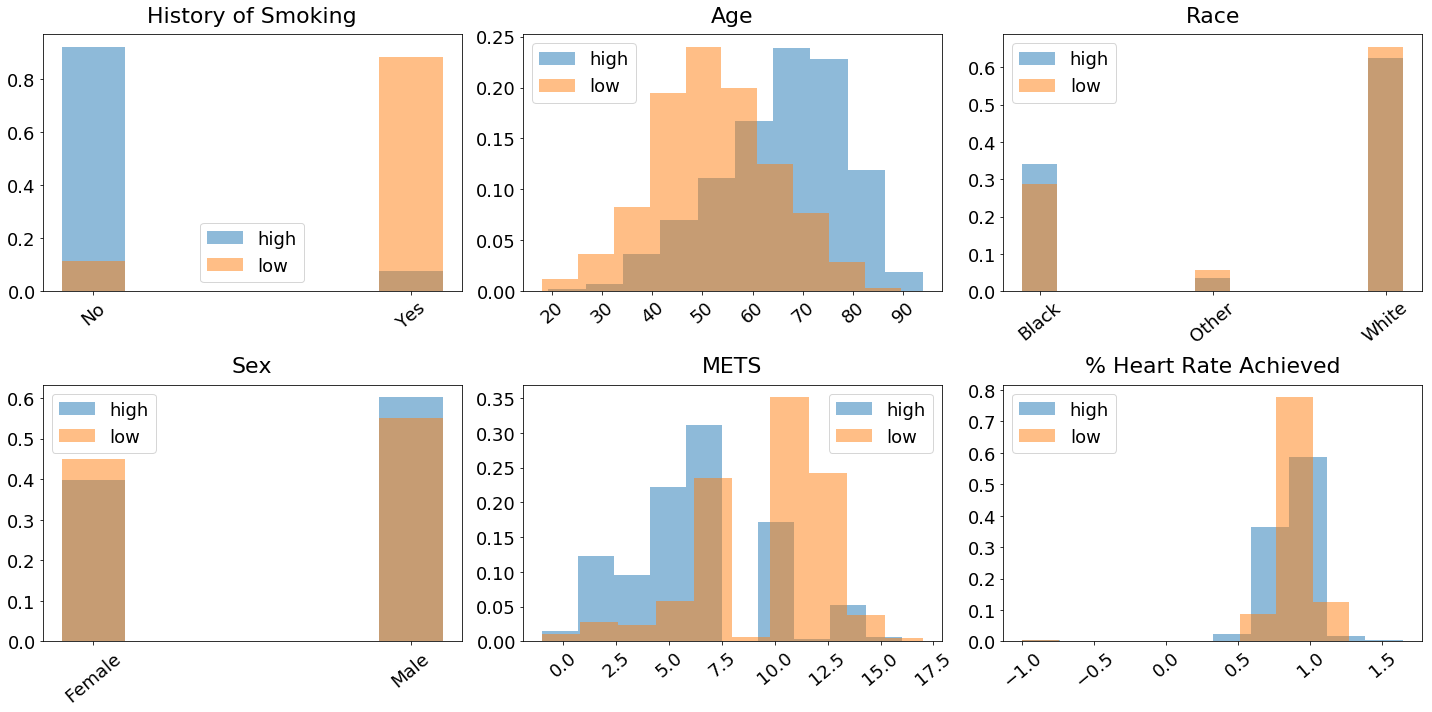

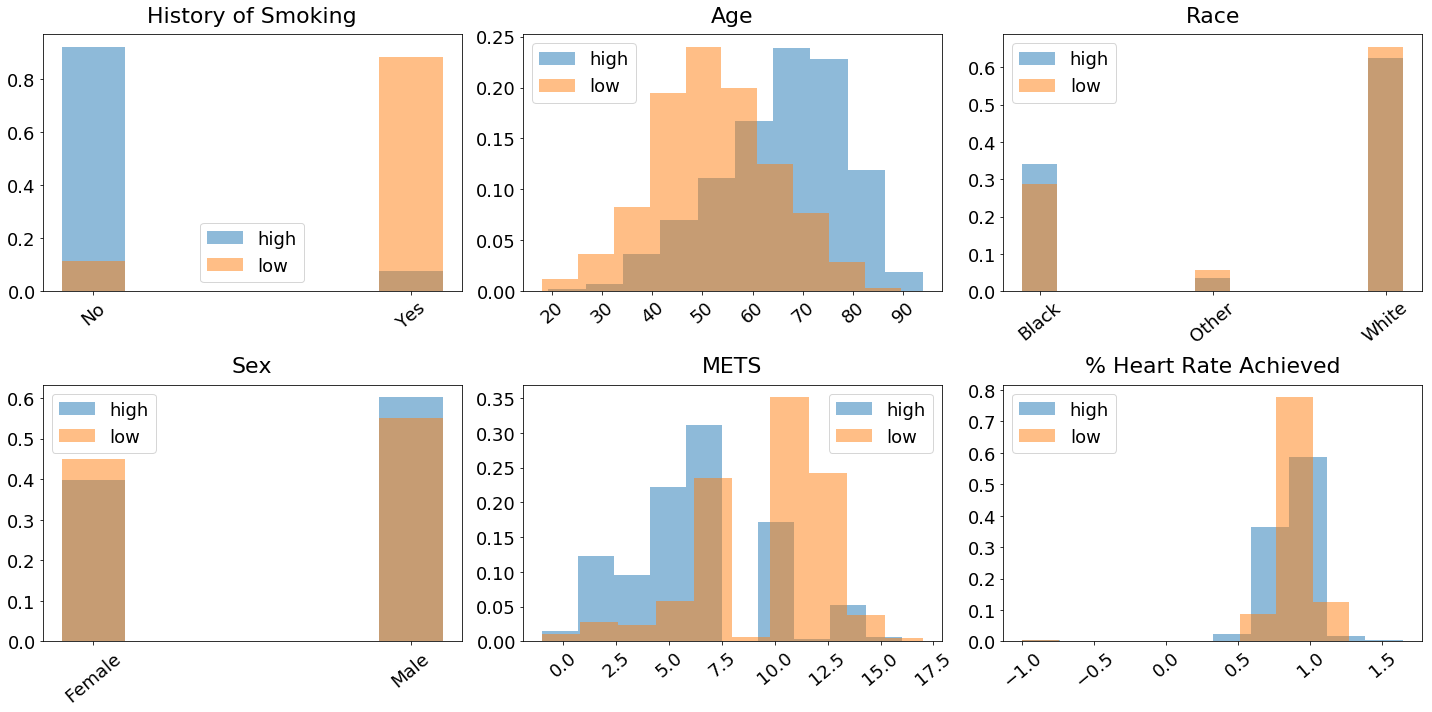

In [30]:
for j in b_dict.keys():
#     plt.figure(figsize=(50,10))
    plt.figure(figsize=(20,10))
    c = 1
    for _,i in enumerate(b_dict[j]):
#         if i in range(14):
#             plt.subplot(2, 7, c)
        if i in [0,1,2,3,5,12]:
            plt.subplot(2, 3, c)
            if i in [0,3,4,5]:
                f = 1
                weighta = np.zeros_like(dataset.train[dead_idx,i]) + 1. / dataset.train[dead_idx,i].shape[0]
                weightb = np.zeros_like(dataset.train[not_idx,i]) + 1. / dataset.train[not_idx,i].shape[0]
                plt.hist(dataset.train[dead_idx,i], alpha=0.5, label='high', align='mid', weights= weighta)
                plt.hist(dataset.train[not_idx,i], alpha=0.5, label='low', align='mid', weights=weightb)
            elif i == 6:
                weighta = np.zeros_like(dataset.train[dead_idx,i]) + 1. / dataset.train[dead_idx,i].shape[0]
                weightb = np.zeros_like(dataset.train[not_idx,i]) + 1. / dataset.train[not_idx,i].shape[0]
                plt.hist(dataset.train[dead_idx,i], bins=13, alpha=0.5, label='high',  weights= weighta)
                plt.hist(dataset.train[not_idx,i], bins=13,alpha=0.5, label='low',  weights=weightb)
            else:
                f = 1
                x, h = np.unique(dataset.ori_train[dead_idx,i], return_counts =True)
                plt.bar(x,h/sum(h), alpha=0.5, label='high', align='center',width =0.2)
                x, h = np.unique(dataset.ori_train[not_idx,i], return_counts =True)
                plt.bar(x,h/sum(h), alpha=0.5, label='low', align='center',width =0.2)
#             plt.subplots_adjust(left=None, bottom=4, right=None, top=5, wspace=2, hspace=None)
            plt.legend(loc='best',fontsize=18)
            plt.xticks(fontsize=18, rotation=40)
            plt.yticks(fontsize=18, rotation=0)
            plt.title(dataset.feature_names[i],fontsize=22, pad = 12)
            plt.tight_layout()
            c=c+1
    plt.savefig('figs/'+str(j)+'.png', bbox_inches='tight')
    plt.show()